# Bibliotecas e configurações

In [43]:
import pandas as pd
import seaborn as sns
import plotly_express as px
from datetime import datetime, timedelta
import pandas_datareader.data as pdr
import yfinance

yfinance.pdr_override() # sobrescreve método de comunicação com o yahoo finance

# IBOVESPA

In [44]:
data_inicial = datetime.now() - timedelta(days=360) 
data_final = datetime.now()

df_ibov = pdr.get_data_yahoo('^BVSP', start=data_inicial, end=data_final)['Adj Close'] # somente a coluna de fechamento ajustado
df_ibov = df_ibov.rename('Fechamento Ajustado')

[*********************100%%**********************]  1 of 1 completed


In [45]:
# Média móvel
df_media_movel = df_ibov.rolling(21).mean()
df_media_movel = df_media_movel.rename('Média Móvel 21 dias')
df_plot = pd.concat([df_ibov, df_media_movel], axis=1)
df_plot

# Análise gráfica
fig = px.line(df_plot)
fig.show()

# Retorno do IBOVESPA (último - primeiro)
retorno_ibov = df_ibov.iloc[-1] / df_ibov.iloc[0] - 1
print(f"Retorno do IBOV: {retorno_ibov:.2%}")


c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Retorno do IBOV: 19.50%


# Exemplo Carteira de Ativos

In [46]:
df_carteira = pd.read_excel('carteira_estudos.xlsx')

df_carteira.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ativos  13 non-null     object
 1   Tipo    13 non-null     object
 2   Qtde    13 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 440.0+ bytes


In [47]:
df_carteira

,Ativos,Tipo,Qtde
0,BOVA11,ETF,100
1,SMAL11,ETF,100
2,MGLU3,Ação,100
3,BBDC4,Ação,100
4,ITUB4,Ação,300
5,ENEV3,Ação,100
6,MOVI3,Ação,100
7,BPAC11,Ação,100
8,NTCO3,Ação,100
9,BCRI11,FII,100


In [48]:
data_inicial = datetime.now() - timedelta(days=360) 
data_final = datetime.now()

lista_ativos = list(df_carteira['Ativos'].astype(str) + ".SA")
lista_ativos

df_cotacoes = pdr.get_data_yahoo(lista_ativos, start=data_inicial, end=data_final)['Adj Close']

[*********************100%%**********************]  13 of 13 completed


In [49]:
df_cotacoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2023-02-23 to 2024-02-16
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BBDC4.SA   244 non-null    float64
 1   BCRI11.SA  244 non-null    float64
 2   BOVA11.SA  244 non-null    float64
 3   BPAC11.SA  244 non-null    float64
 4   ENEV3.SA   244 non-null    float64
 5   ITUB4.SA   244 non-null    float64
 6   KNRI11.SA  244 non-null    float64
 7   MGLU3.SA   244 non-null    float64
 8   MOVI3.SA   244 non-null    float64
 9   NTCO3.SA   244 non-null    float64
 10  SMAL11.SA  244 non-null    float64
 11  VILG11.SA  244 non-null    float64
 12  XPLG11.SA  244 non-null    float64
dtypes: float64(13)
memory usage: 26.7 KB


In [50]:
# Análise gráfica
fig = px.line(df_cotacoes)
fig.show()

c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [51]:
# Normalização
df_cotacoes_norm = df_cotacoes / df_cotacoes.iloc[0]

fig = px.line(df_cotacoes_norm)
fig.show()

c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



### Rendimento da Carteira

In [52]:
df_valor_investido = pd.DataFrame()

for ativo in df_carteira["Ativos"]:
  qtde_ativos = df_carteira.loc[df_carteira['Ativos'] == ativo, "Qtde"].values[0]
  #print(ativo, qtde_ativos)
  df_valor_investido[ativo] = qtde_ativos * df_cotacoes[f"{ativo}.SA"]

df_valor_investido["Total"] = df_valor_investido.sum(axis=1)
df_valor_investido

,BOVA11,SMAL11,MGLU3,BBDC4,ITUB4,ENEV3,MOVI3,BPAC11,NTCO3,BCRI11,VILG11,KNRI11,XPLG11,Total
Date,,,,,,,,,,,,,,
2023-02-23,10415.000153,9080.000305,332.975101,1298.891258,7587.824821,1128.999996,661.737967,2025.973892,1532.999992,8301.156616,8082.926941,12576.271820,8509.328461,71534.087324
2023-02-24,10237.999725,9069.999695,337.651706,1257.296753,7355.718613,1118.000031,649.903631,1983.949471,1489.999962,8414.410400,8132.770538,12655.751801,8592.089081,71295.541406
2023-02-27,10229.000092,8994.999695,341.392994,1245.007420,7261.157227,1122.999954,643.986464,1945.834160,1497.000027,8414.410400,8084.773254,12568.875122,8592.089081,70941.525888
2023-02-28,10115.000153,8836.000061,335.781002,1236.499214,7286.948204,1143.000031,648.917437,1964.403343,1531.999969,8386.981964,8030.313873,12685.321808,8711.113739,70912.280798
2023-03-01,10119.999695,8866.000366,302.109408,1227.045822,7168.706703,1119.999981,606.510973,1899.900627,1448.999977,8211.193085,7940.232086,12703.003693,8540.526581,70154.228997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-08,12451.000214,10400.000000,206.999993,1356.000042,10158.000183,1268.999958,852.000046,3733.000183,1652.000046,7376.000214,9037.999725,16269.999695,10850.000000,85612.000299
2024-02-09,12412.999725,10365.000153,207.999992,1346.000004,10287.000275,1282.999992,830.000019,3756.999969,1648.999977,7456.999969,9100.000000,16330.000305,10872.000122,85897.000504
2024-02-14,12323.000336,10244.999695,201.999998,1336.999989,10287.000275,1234.000015,805.000019,3702.000046,1670.000076,7441.999817,9030.000305,16328.999329,10890.000153,85496.000051


### Comparando valor investido com IBOV

In [53]:
print("Atenção aqui: verificar se os dias do IBOV estão iguais aos dias da carteira")

Atenção aqui: verificar se os dias do IBOV estão iguais aos dias da carteira


In [54]:
# Normalizando
df_ibov_norm = df_ibov / df_ibov.iloc[0]
df_valor_investido_norm = df_valor_investido / df_valor_investido.iloc[0]

# Renomeando
df_ibov_norm = df_ibov_norm.rename("IBOV")
df_valor_investido_norm.rename(columns={'Total': 'Valor Investido'}, inplace = True)

# Concatenando
df_plot = pd.concat([df_ibov_norm, df_valor_investido_norm], axis=1)
df_plot

# Gráfico
fig = px.line(df_plot, title="Variações")
fig.show()

# Retorno 
# Obs: com as tabelas normalizadas iniciando em 1, o retorno consiste no último valor
retorno_ibov = df_plot['IBOV'].iloc[-1] -1 
# print(f"Retorno do IBOV: {retorno_ibov:.2%}")
retorno_valor_investido = df_plot['Valor Investido'].iloc[-1] -1
# print(f"Retorno do total investido: {retorno_valor_investido:.2%}")

c:\Users\luiza\AppData\Local\Programs\Python\Python310\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [55]:
# Correlação da carteira com o ibov
corrMatrix = df_plot.corr()
#print(corrMatrix)
print("OBS: Correlação não é causalidade")

OBS: Correlação não é causalidade


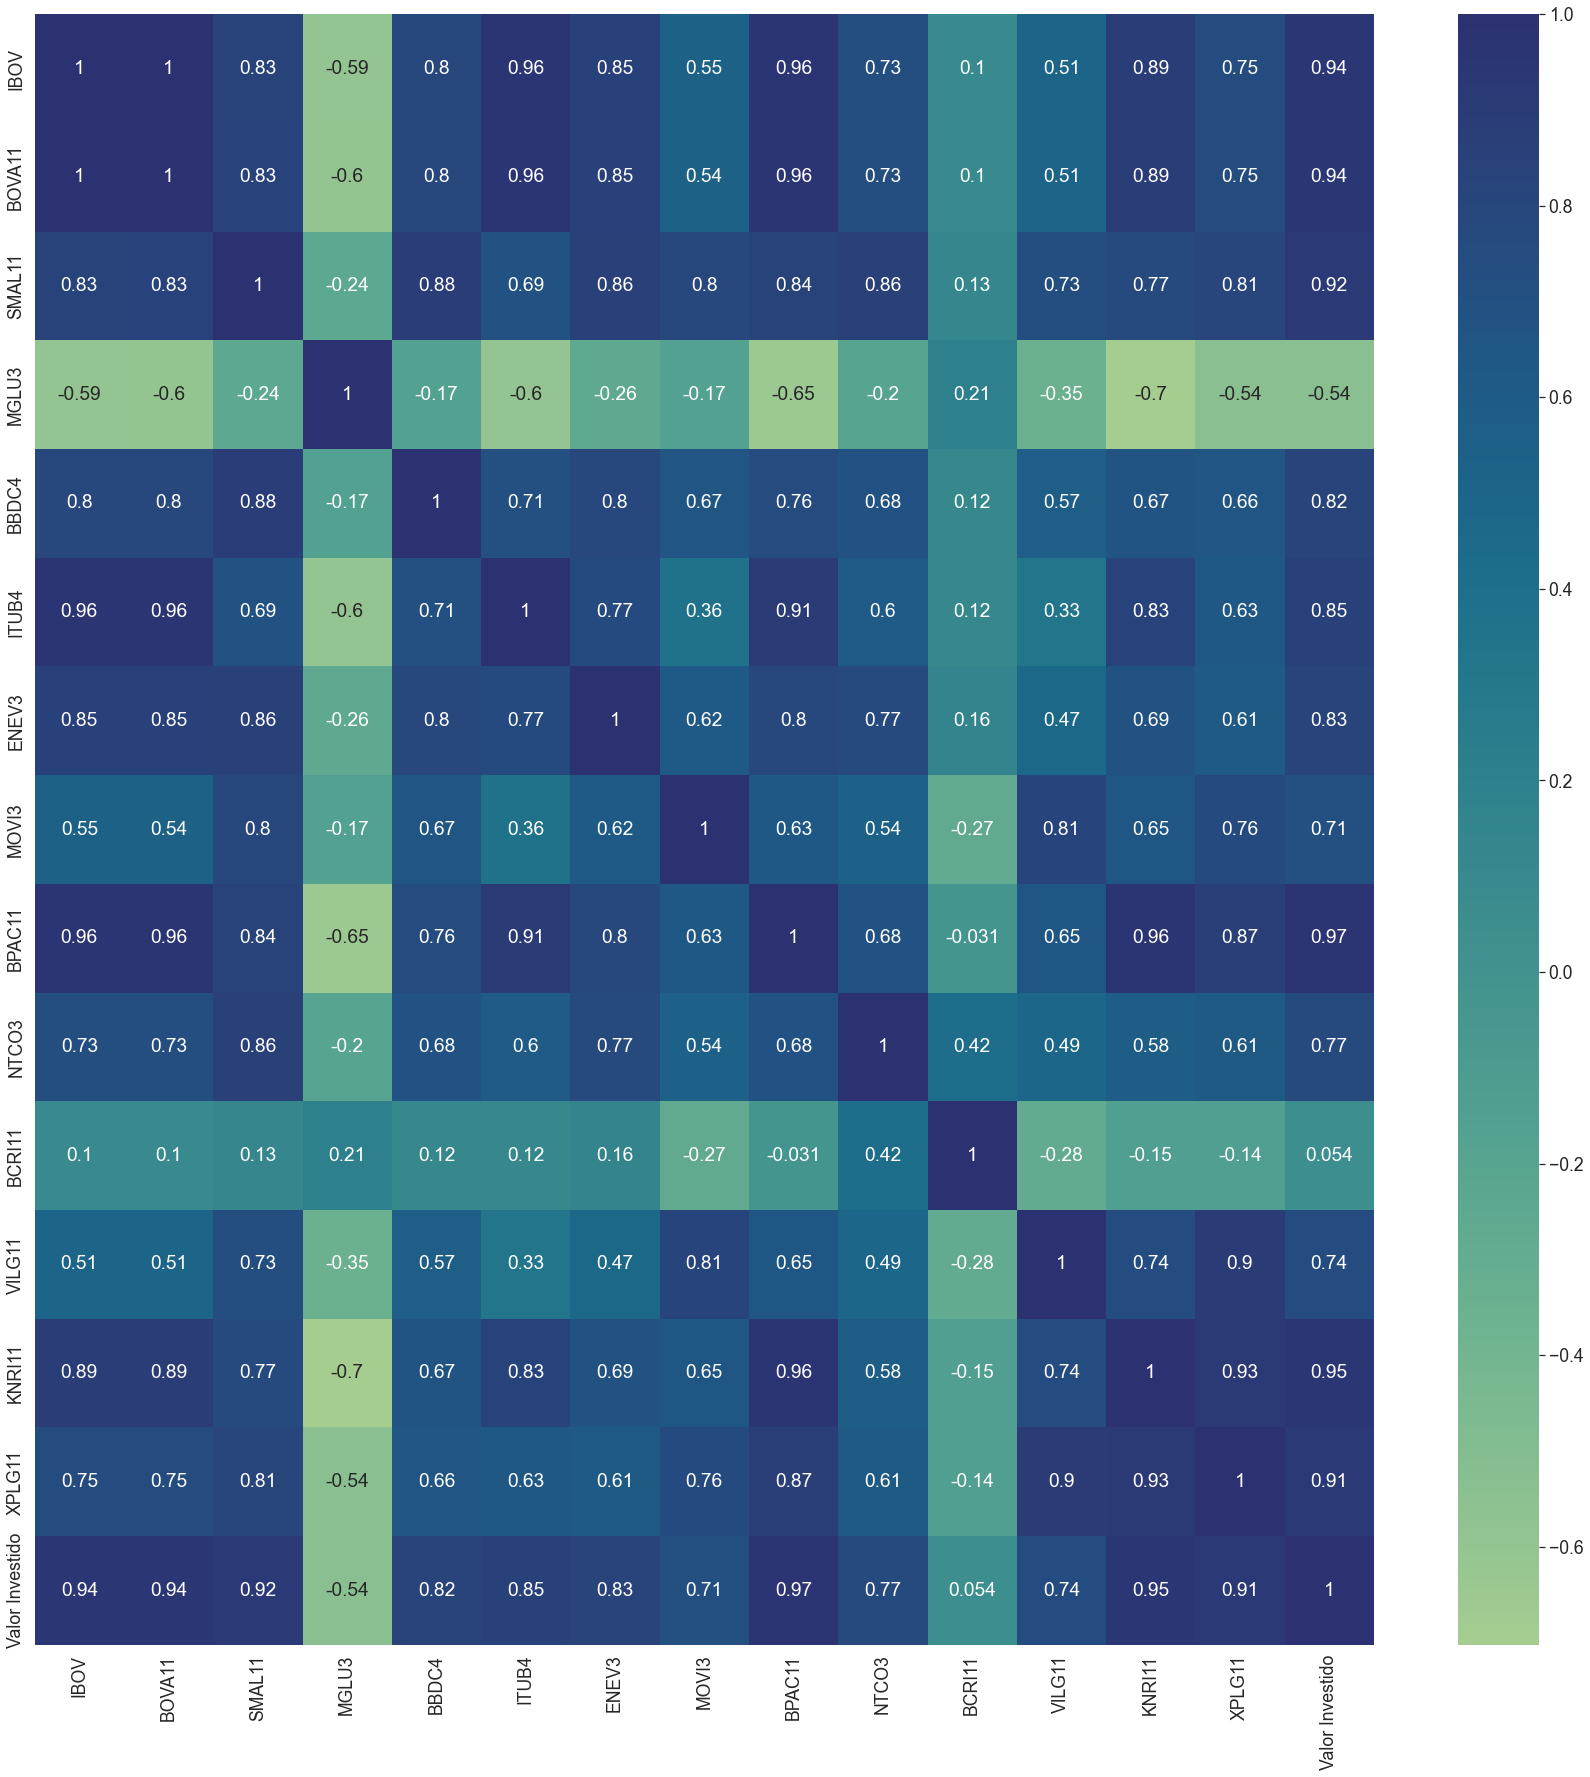

In [64]:
# Mapa de calor (heatmap)
cmap = sns.diverging_palette(
    h_neg=240,
    h_pos=10,
    s=100,
    as_cmap=True,
) # FONTE: https://medium.com/@eduardopaul/um-detalhe-simples-para-melhorar-seu-heatmap-2ccff36a4391

sns.heatmap(corrMatrix, annot=True, cmap="crest")
sns.set(rc={'figure.figsize':(30,30)} )
sns.set_style('white')